<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_NLP_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Text:
The boy's cars are different colors. He is driving automatically to the U.S.A. on 7/30.

Normalized Text:
the boys cars are different colors he is driving automatically to the usa on 7/30

Tokens:
['the', 'boys', 'cars', 'are', 'different', 'colors', 'he', 'is', 'driving', 'automatically', 'to', 'the', 'usa', 'on', '7/30']

Filtered Tokens (Stopwords Removed):
['boys', 'cars', 'different', 'colors', 'driving', 'automatically', 'usa', '7/30']

Stemmed Tokens:
['boy', 'car', 'different', 'color', 'driv', 'automatical', 'usa', '7/30']

Lemmatized Tokens:
['boy', 'car', 'different', 'color', 'drive', 'automatic', 'usa', '7/30']

Soundex for 'Automobile': A351

DataFrame Showing All Processing Steps:

   Original Token       Filtered      Stemmed Lemmatized
0             the           boys          boy        boy
1            boys           cars          car        car
2            cars      different    different  different
3             are         colors        color      

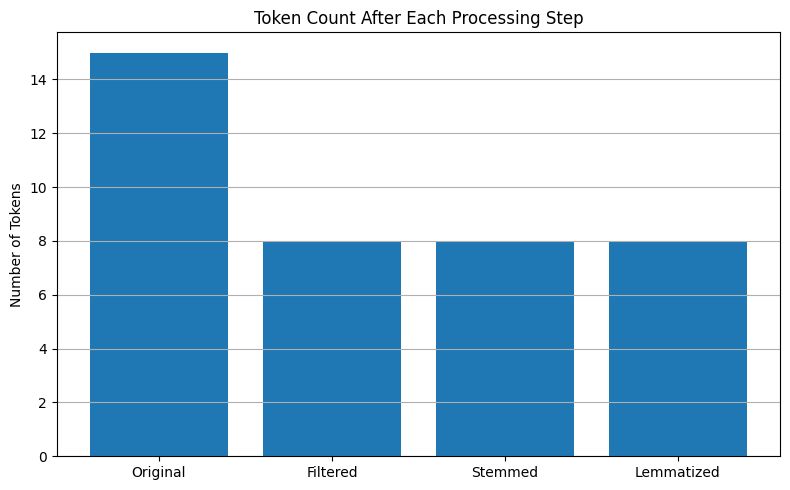

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Sample input
text = "The boy's cars are different colors. He is driving automatically to the U.S.A. on 7/30."
print(f"Original Text:\n{text}\n")

# Normalization (lowercase, remove punctuation except slashes)
normalized = re.sub(r"[^\w\s/]", "", text.lower())
print(f"Normalized Text:\n{normalized}\n")

# Tokenization
tokens = normalized.split()
print(f"Tokens:\n{tokens}\n")

# Stop word filtering
custom_stopwords = {'the', 'is', 'are', 'to', 'on', 'he', 'a', 'an'}
filtered_tokens = [word for word in tokens if word not in custom_stopwords]
print(f"Filtered Tokens (Stopwords Removed):\n{filtered_tokens}\n")

# Stemming
def crude_stem(word):
    suffixes = ['ing', 'ly', 'ed', 's']
    for suffix in suffixes:
        if word.endswith(suffix) and len(word) > len(suffix) + 2:
            return word[:-len(suffix)]
    return word

stemmed = [crude_stem(word) for word in filtered_tokens]
print(f"Stemmed Tokens:\n{stemmed}\n")

# Lemmatization
lemm_dict = {
    "cars": "car",
    "colors": "color",
    "driving": "drive",
    "automatically": "automatic",
    "boys": "boy"
}
lemmatized = [lemm_dict.get(word, word) for word in filtered_tokens]
print(f"Lemmatized Tokens:\n{lemmatized}\n")

# Soundex
def soundex(name):
    name = name.upper()
    soundex_codes = {'BFPV': '1', 'CGJKQSXZ': '2', 'DT': '3', 'L': '4', 'MN': '5', 'R': '6'}
    translation = ''
    for char in name[1:]:
        for key in soundex_codes:
            if char in key:
                code = soundex_codes[key]
                if code != translation[-1:] or not translation:
                    translation += code
                break
    translation = name[0] + translation + '000'
    return translation[:4]

soundex_result = soundex("Automobile")
print(f"Soundex for 'Automobile': {soundex_result}\n")

# DataFrame
full_processing_df = pd.DataFrame({
    'Original Token': tokens,
    'Filtered': filtered_tokens + [''] * (len(tokens) - len(filtered_tokens)),
    'Stemmed': stemmed + [''] * (len(tokens) - len(stemmed)),
    'Lemmatized': lemmatized + [''] * (len(tokens) - len(lemmatized))
})
print("DataFrame Showing All Processing Steps:\n")
print(full_processing_df)

# Bar chart visualization
stages = ['Original', 'Filtered', 'Stemmed', 'Lemmatized']
counts = [len(tokens), len(filtered_tokens), len(stemmed), len(lemmatized)]

plt.figure(figsize=(8, 5))
plt.bar(stages, counts)
plt.title('Token Count After Each Processing Step')
plt.ylabel('Number of Tokens')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
